# Employee Churn Analysis and Prediction

Data source: kaggle- https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/code

### Loading Dataset

In [1]:
import pandas as pd
# Load the dataset
hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') 
# format for floating-point values
pd.set_option('precision', 2)
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Cleaning

In [249]:
# checking for missing values
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values exist in the datasets.

In [250]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [251]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [252]:
# check for data cardinarlity for all data features
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [253]:
# Look closely for all the categorical features

# print out categorical features
cat_cols = hr.columns[hr.dtypes=='object']
data_cat = hr[cat_cols]
print(cat_cols)
print(cat_cols.shape)
data_cat.head()

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
(9,)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [254]:
#print out unique value for categorical features
for col in data_cat:
    print(col,data_cat[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


From the cardinality check, we can see that 4 variables are either only has 1 level or has too many levels. Therefore, these 4 variables should be excluded for the analysis since they do not generate any helpful insights.  <br>
- 'EmployeeCount': : only has 1 level. <br>
- 'EmployeeNumber': has 1,470 values. It means each employee has an unique ID number. <br>
- 'Over18': only has 1 level. All employees are over 18 years old <br>
- 'StandardHours': only has 1 level. All employees have the same standard hours under the company's policy. 

In [255]:
#remove 4 useless features (only 31 columns left after the removal)
hrNo4 = hr.copy()
hrNo4 = hrNo4.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)
hrNo4.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

### Explorative Analysis

##### 1. How is our data distributed?

C:\Users\Happy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Happy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Happy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Happy\Anaconda3\lib\site-packages\pandas\plotting\_matpl

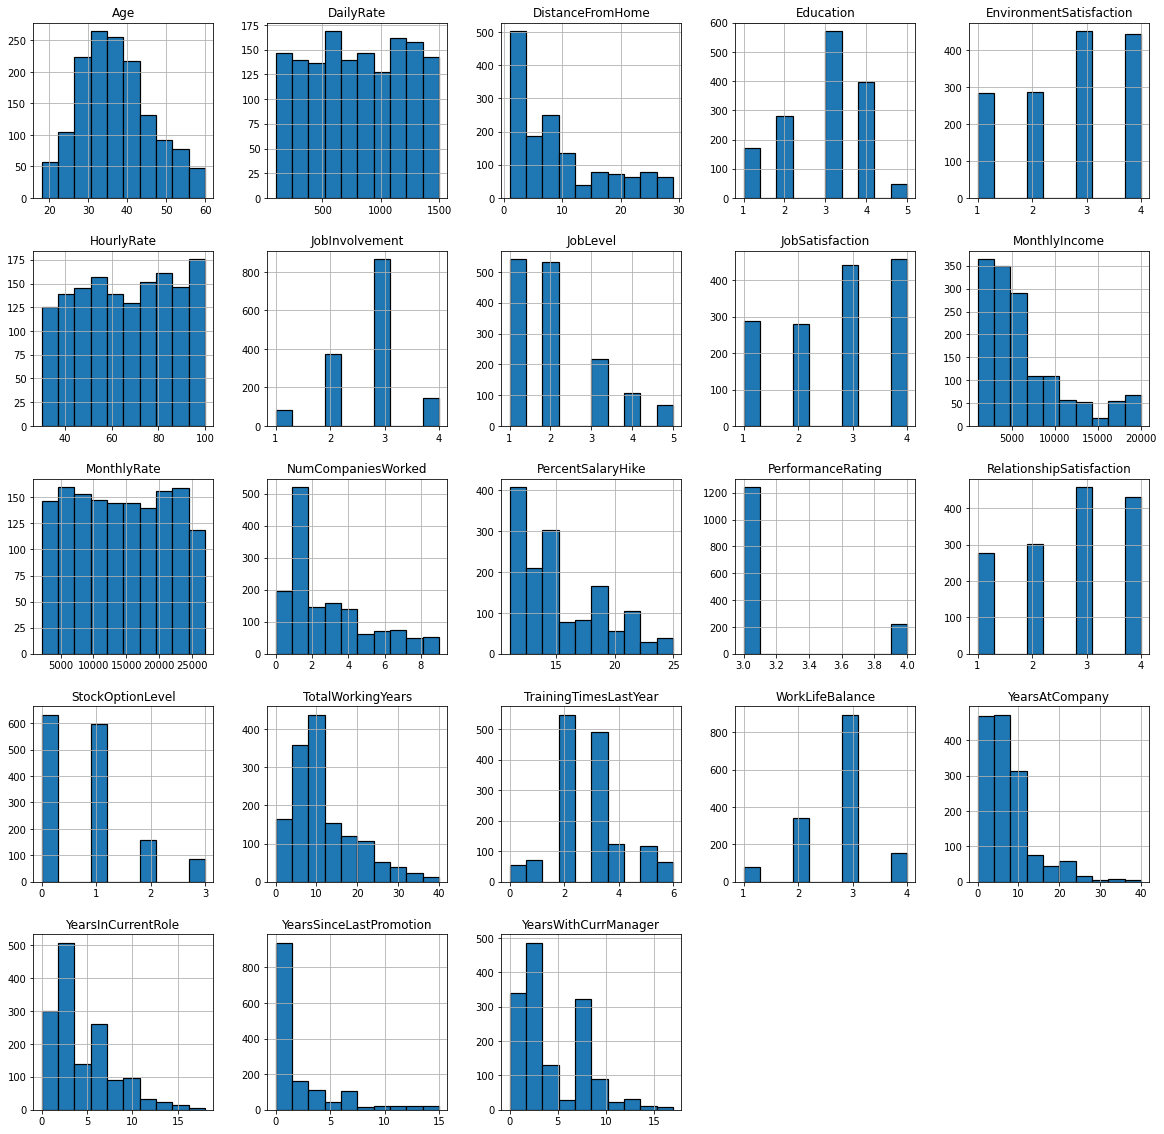

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

#see distribution
hrNo4.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

From the distribution of the each numerical variables, none of them look like normaliy distributed. Age maybe normally distributed, but it still looks like skewed to the left.

##### 2. How many employee left or how many stayed in our dataset?

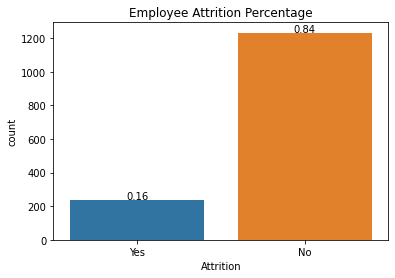

In [256]:
## Show the churn presentage in our analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

total = float(len(hrNo4))
ax = sns.countplot(hrNo4['Attrition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

plt.title("Employee Attrition Percentage")
plt.show()

##### 3. Would people leave because too long with no promotion?

Text(0, 0.5, 'Years')

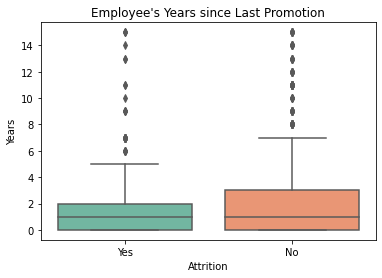

In [257]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=hrNo4 ,palette="Set2")
plt.title("Employee's Years since Last Promotion")
plt.ylabel('Years')

Surprisingly 75% of people who left last promoted in 2 years while 75% of people who stayed last promoted in 3 years 


##### 4. People in which department are most likely to leave?

Text(0, 0.5, 'Years')

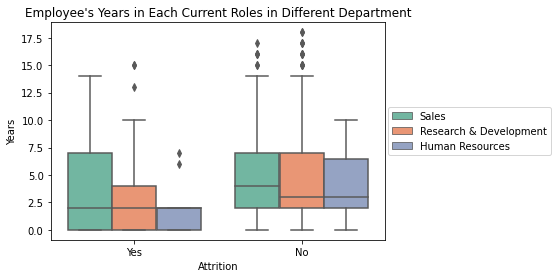

In [258]:
g = sn.boxplot(x='Attrition',y='YearsInCurrentRole',data=hrNo4,hue='Department',palette="Set2")
g.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title("Employee's Years in Each Current Roles in Different Department")
plt.ylabel('Years')

Text(0, 0.5, 'Years')

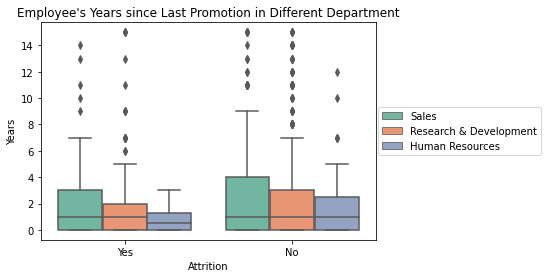

In [259]:
#breakdown by department to see would people leave because too long with no promotion
h = sn.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=hrNo4,hue='Department',palette="Set2")
h.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title("Employee's Years since Last Promotion in Different Department")
plt.ylabel('Years')

##### 5. Whether there is geneder discrimination?

Text(0.5, 1.0, "Employee's Daily Rate by Gender")

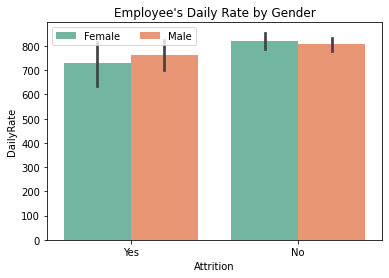

In [260]:
a = sn.barplot(x = 'Attrition',y='DailyRate',data=hrNo4,hue='Gender', palette="Set2")
a.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2)
plt.title("Employee's Daily Rate by Gender")

##### 6. Would people live because they live far away?

C:\Users\Happy\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, "Employee's Distance Between Home and Company")

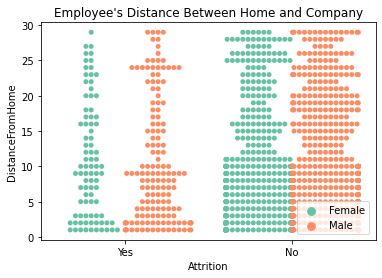

In [261]:
b=sn.swarmplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=hrNo4, palette="Set2", split=True)
b.legend(loc='upper left', bbox_to_anchor=(0.75, 0.2), ncol=1)
plt.title("Employee's Distance Between Home and Company")

##### 7. How each numerical variables correlated with each other?

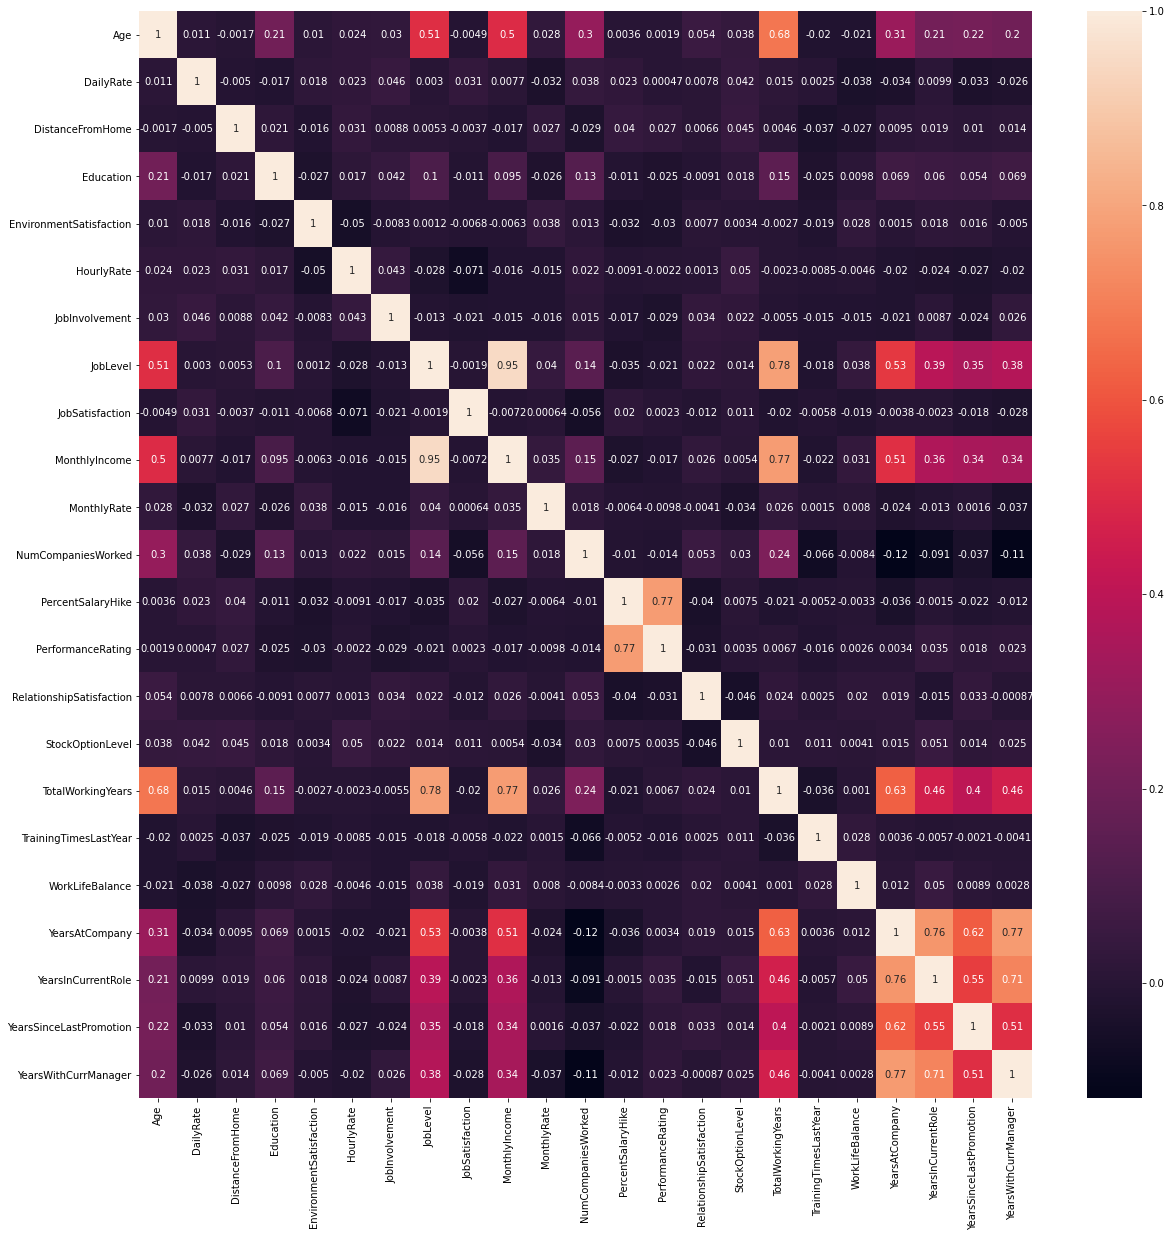

In [262]:
# Create heatmap to visualize the correlations
plt.figure(figsize=(20,20))
corrMatrix = hrNo4.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [263]:
c1 = corrMatrix.abs().unstack()
c2 = c1.sort_values(ascending = False)
# to check the top 20 set of features which have the highest correlations
c2[c2.values != 1].head(20)

JobLevel                 MonthlyIncome              0.95
MonthlyIncome            JobLevel                   0.95
TotalWorkingYears        JobLevel                   0.78
JobLevel                 TotalWorkingYears          0.78
PerformanceRating        PercentSalaryHike          0.77
PercentSalaryHike        PerformanceRating          0.77
TotalWorkingYears        MonthlyIncome              0.77
MonthlyIncome            TotalWorkingYears          0.77
YearsAtCompany           YearsWithCurrManager       0.77
YearsWithCurrManager     YearsAtCompany             0.77
YearsAtCompany           YearsInCurrentRole         0.76
YearsInCurrentRole       YearsAtCompany             0.76
YearsWithCurrManager     YearsInCurrentRole         0.71
YearsInCurrentRole       YearsWithCurrManager       0.71
TotalWorkingYears        Age                        0.68
Age                      TotalWorkingYears          0.68
YearsAtCompany           TotalWorkingYears          0.63
TotalWorkingYears        YearsA

It seems the JobLevel has very strong relationship with MonthlyIncome and TotalWorkingYears. These 2 pairs have the highest correlations among other variables.

### Feature Engineerings

##### 1. Numerical Variables: Normalization - MinMaxScaler range (0,1)

In [264]:
from sklearn.preprocessing import MinMaxScaler

numerical=[]
norm = MinMaxScaler(feature_range=(0,1))
for column in hrNo4:
    if column not in data_cat:
        numerical.append(column)        

NormNo4 = hrNo4.copy()
#Apply the feature scaling operation on dataset using fit_transform() method
NormNo4[numerical] = norm.fit_transform(NormNo4[numerical])
NormNo4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.55,Yes,Travel_Rarely,0.72,Sales,0.00,0.25,Life Sciences,0.33,Female,...,0.0,0.00,0.00,0.20,0.0,0.00,0.15,0.22,0.00,0.29
1,0.74,No,Travel_Frequently,0.13,Research & Development,0.25,0.00,Life Sciences,0.67,Male,...,1.0,1.00,0.33,0.25,0.5,0.67,0.25,0.39,0.07,0.41
2,0.45,Yes,Travel_Rarely,0.91,Research & Development,0.04,0.25,Other,1.00,Male,...,0.0,0.33,0.00,0.18,0.5,0.67,0.00,0.00,0.00,0.00
3,0.36,No,Travel_Frequently,0.92,Research & Development,0.07,0.75,Life Sciences,1.00,Female,...,0.0,0.67,0.00,0.20,0.5,0.67,0.20,0.39,0.20,0.00
4,0.21,No,Travel_Rarely,0.35,Research & Development,0.04,0.00,Medical,0.00,Male,...,0.0,1.00,0.33,0.15,0.5,0.67,0.05,0.11,0.13,0.12


##### 2. Categorical Variables: One-Hot Encoding

In [265]:
# create x by dropping target feature "attrition"
x = NormNo4.copy().drop(['Attrition'],axis=1)
x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.55,Travel_Rarely,0.72,Sales,0.00,0.25,Life Sciences,0.33,Female,0.91,...,0.0,0.0,0.00,0.20,0.0,0.00,0.15,0.22,0.00,0.29
1,0.74,Travel_Frequently,0.13,Research & Development,0.25,0.00,Life Sciences,0.67,Male,0.44,...,1.0,1.0,0.33,0.25,0.5,0.67,0.25,0.39,0.07,0.41


In [266]:
# convert all category variables to numerical variables
categorical = []
for column in x:
    if column in data_cat:
        categorical.append(column)
        
x= pd.get_dummies(x,columns=categorical)
x.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.55,0.72,0.00,0.25,0.33,0.91,0.67,0.25,1.00,0.26,...,0,0,0,1,0,0,0,1,0,1
1,0.74,0.13,0.25,0.00,0.67,0.44,0.33,0.25,0.33,0.22,...,0,0,1,0,0,0,1,0,1,0


In [277]:
# create dummy variables for y
y=NormNo4['Attrition'].map({'Yes':1,'No':0})
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Training & Testing

In [268]:
# convert x and y to numpy array
xnumpy = x.to_numpy()
ynumpy = y.to_numpy()
xnumpy

array([[0.54761905, 0.71581961, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [269]:
# perform stratify k folds validation (k=10)
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
skf = StratifiedKFold(n_splits=10, random_state=42)
xtrain = []
ytrain = []
xtest = []
ytest = []
print('Each 10 training and testing sets include number of data points:')
for train, test in skf.split(x,y):
    xtrain.append(xnumpy[train])
    ytrain.append(ynumpy[train])
    xtest.append(xnumpy[test])
    ytest.append(ynumpy[test])
    print(f"""{len(xnumpy[train])},{len(xnumpy[test])}""")


Each 10 training and testing sets include number of data points:
1322,148
1322,148
1322,148
1323,147
1323,147
1323,147
1323,147
1324,146
1324,146
1324,146


In [270]:
# take a look one of the training set
xtrain[0]

array([[0.78571429, 0.75017895, 0.25      , ..., 1.        , 1.        ,
        0.        ],
       [0.33333333, 0.66642806, 0.28571429, ..., 1.        , 1.        ,
        0.        ],
       [0.52380952, 0.92555476, 0.89285714, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

### Modeling

#### 1. Linear Logistics Regression

###### ------ Include all variables

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

logLR = LogisticRegression(random_state=42)
ACCscoresLR = cross_val_score(logLR,x, y,cv=skf)
F1scoresLR = cross_val_score(logLR,x, y,scoring = 'f1',cv=skf)
MSEscoresLR = cross_val_score(logLR,x, y,scoring ='neg_mean_squared_error',cv=skf)   
print(f"""The accuracy score of logistics regression model is {ACCscoresLR.mean()}
The f1 score of logistics regression model is {F1scoresLR.mean()}
The Mean Square Error score of logistics regression model is {-MSEscoresLR.mean()}""")

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The accuracy score of logistics regression model is 0.8816110561218193
The f1 score of logistics regression model is 0.5113640667512342
The Mean Square Error score of logistics regression model is 0.11838894387818069


###### ------ Exclude 'JobLevel' feature

In [312]:
# check the header name from orignal dataset
x.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.55,0.72,0.00,0.25,0.33,0.91,0.67,0.25,1.00,0.26,...,0,0,0,1,0,0,0,1,0,1
1,0.74,0.13,0.25,0.00,0.67,0.44,0.33,0.25,0.33,0.22,...,0,0,1,0,0,0,1,0,1,0


In [311]:
# remove the existing joblevel feature from the dataset
xNoJobLevel = x.copy().drop('JobLevel',axis=1)
xNoJobLevel.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.55,0.72,0.00,0.25,0.33,0.91,0.67,1.00,0.26,0.70,...,0,0,0,1,0,0,0,1,0,1
1,0.74,0.13,0.25,0.00,0.67,0.44,0.33,0.33,0.22,0.92,...,0,0,1,0,0,0,1,0,1,0


In [327]:
# fit the new data into the logistics regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

logLR = LogisticRegression(random_state=42)
ACCscoresLRNoJobLevel = cross_val_score(logLR,xNoJobLevel, y,cv=skf)
F1scoresLRNoJobLevel = cross_val_score(logLR,xNoJobLevel, y,scoring = 'f1',cv=skf)
MSEscoresLRNoJobLevel = cross_val_score(logLR,xNoJobLevel, y,scoring ='neg_mean_squared_error',cv=skf)   
print(f"""The accuracy score of logistics regression model is {ACCscoresLRNoJobLevel.mean()}
The f1 score of logistics regression model is {F1scoresLRNoJobLevel.mean()}
The Mean Square Error score of logistics regression model is {-MSEscoresLRNoJobLevel.mean()}""")

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The accuracy score of logistics regression model is 0.8823006470266744
The f1 score of logistics regression model is 0.5094219539859507
The Mean Square Error score of logistics regression model is 0.1176993529733256


Very minimum difference betweeen whether include joblevel or not, we decide to keep it. 

###### Hyperparameter Tuning

In [308]:
# The logistics regression does not have too much parameter to tune, 
# but we can choose different solvers and penalty, solver and c_values
from sklearn.model_selection import GridSearchCV
logLR = LogisticRegression(random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=logLR, param_grid=grid, n_jobs=-1, cv=skf, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.884354 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


###### Re-fit our best model

In [315]:
logLRNew = LogisticRegression(random_state=42,penalty='l2',C=10,solver='newton-cg')
ACCscoresLRNew = cross_val_score(logLRNew,x, y,cv=skf)
F1scoresLRNew = cross_val_score(logLRNew,x, y,scoring = 'f1',cv=skf)
print(f"""The accuracy score of random forest model is {ACCscoresLRNew.mean()}
The f1 score of random forest model is {F1scoresLRNew.mean()}""")

The accuracy score of random forest model is 0.8843369298848751
The f1 score of random forest model is 0.5461557005332656


###### Confusion Matrix

In [316]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_predLR=cross_val_predict(logLRNew, x, y, cv=skf)
conf_matrixLR = confusion_matrix(y,y_predLR)
conf_matrixLR

array([[1196,   37],
       [ 133,  104]], dtype=int64)

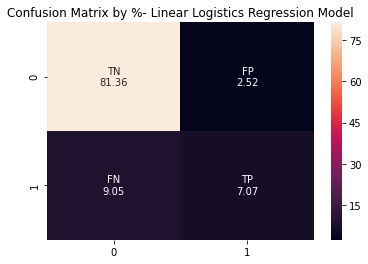

In [317]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

text = np.asarray([['TN', 'FP'], ['FN', 'TP']])
dataLR=(conf_matrixLR/np.sum(conf_matrixLR)) *100
labelsLR = (np.asarray(["{0}\n{1:.2f}".format(text,dataLR) for text, dataLR in zip(text.flatten(), dataLR.flatten())])).reshape(2,2)
plt.title('Confusion Matrix by %- Linear Logistics Regression Model')
sns.heatmap(dataLR, annot=labelsLR, fmt='')

#### 2. Polynomial Logistics Regression

In [336]:
# Check for n = 2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score

allScore=[]
for i in range(len(xtrain)):
    poly2 = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
    X_poly2 = poly2.fit_transform(xtrain[i])

    lr = LogisticRegression(random_state=42)
    lr.fit(X_poly2,ytrain[i])

    acc = lr.score(poly2.transform(xtest[i]), ytest[i])
    allScore.append(acc)
    
print(f"""The accuracy scores for all models are: {allScore}
     
The average accurcy for this model is: {(sum(allScore)/10)*100:.2f}%""")


C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The accuracy scores for all models are: [0.8716216216216216, 0.8648648648648649, 0.8648648648648649, 0.8367346938775511, 0.8503401360544217, 0.8367346938775511, 0.8367346938775511, 0.8561643835616438, 0.8698630136986302, 0.8424657534246576]
     
The average accurcy for this model is: 85.30%


In [122]:
# Check for n = 3
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score

allScore=[]
f1Train=[]
f1Test=[]
for i in range(len(xtrain)):
    poly3 = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
    X_poly3 = poly3.fit_transform(xtrain[i])

    lr = LogisticRegression(random_state=42)
    lr.fit(X_poly3,ytrain[i])
    
    acc = lr.score(poly3.transform(xtest[i]), ytest[i])
    allScore.append(acc)
    
    #f1Train.append(f1_score(ytrain[i],lr.predict(poly3.transform(xtrain[i]))*100))
    #f1Test.append(f1_score(ytest[i],lr.predict(poly3.transform(xtest[i]))*100))
     
    
print(f"""The accuracy scores for all models are: {allScore}
     
The average accurcy for this model is: {(sum(allScore)/10)*100:.2f}%""")


C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The accuracy scores for all models are: [0.831081081081081, 0.8648648648648649, 0.8513513513513513, 0.8163265306122449, 0.8571428571428571, 0.8231292517006803, 0.8299319727891157, 0.8424657534246576, 0.8698630136986302, 0.8082191780821918]
     
The average accurcy for this model is: 83.94%


In [123]:
# Check for n = 4
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

allScore=[]
for i in range(len(xtrain)):
    poly4 = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
    X_poly4 = poly4.fit_transform(xtrain[i])

    lr = LogisticRegression(random_state=42)
    lr.fit(X_poly4,ytrain[i])

    acc = lr.score(poly4.transform(xtest[i]), ytest[i])
    allScore.append(acc)
    
print(f"""The accuracy scores for all models are: {allScore}
     
The average accurcy for this model is: {(sum(allScore)/10)*100:.2f}%""")

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The accuracy scores for all models are: [0.8175675675675675, 0.8445945945945946, 0.8581081081081081, 0.8027210884353742, 0.8571428571428571, 0.8163265306122449, 0.8367346938775511, 0.8356164383561644, 0.8698630136986302, 0.8013698630136986]
     
The average accurcy for this model is: 83.40%


As n increase, the accuracy decreases from the model. Therefore, our data fits linear logistics regress model the best and had a poor performance on polynomical logistics regression.

#### 2. Decision Tree

###### Decision Tree Model from Scikit Learn

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

logDT = DecisionTreeClassifier(random_state=42)
ACCscoresDT = cross_val_score(logDT,x, y,cv=skf)
F1scoresDT = cross_val_score(logDT,x, y,scoring = 'f1',cv=skf)
print(f"""The accuracy score of random forest model is {ACCscoresDT.mean()}
The f1 score of random forest model is {F1scoresDT.mean()}""")

The accuracy score of random forest model is 0.7911507957496215
The f1 score of random forest model is 0.3718951292993846


###### Hyperparameter Tuning

In [281]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Use PCA to reduce the dimension of features
# Use Decision Tree Classifier for model
# Set up a pipeline

pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier(random_state=42)

pipe = Pipeline(steps=[('pca', pca),('dec_tree', decisiontree)])
n_components = list(range(1,x.shape[1]+1,1))

# two required input for decision tree
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth,
                      dec_tree__splitter=splitter,
                      dec_tree__max_features=max_features)

clf_GS = GridSearchCV(pipe, parameters, cv=skf)
clf_GS.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dec_tree',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,...
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
            

In [283]:
clf_GS.best_params_

{'dec_tree__criterion': 'gini',
 'dec_tree__max_depth': 6,
 'dec_tree__max_features': 'sqrt',
 'dec_tree__splitter': 'best',
 'pca__n_components': 8}

In [282]:
print(clf_GS.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


###### Re-fit the model using best parameters

In [356]:
#Apply the above suggestion
decision_treeNew = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

ACCscoresDT_New = cross_val_score(decision_treeNew,x, y,cv=skf)
F1scoresDT_New = cross_val_score(decision_treeNew,x, y,scoring = 'f1',cv=skf)
print(f"""The accuracy score of decision tree model is {ACCscoresDT_New.mean()}
The f1 score of decision tree model is {F1scoresDT_New.mean()}""")

The accuracy score of decision tree model is 0.8191167544396507
The f1 score of decision tree model is 0.2773089808191328


###### Confusion matrix

In [357]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_predDT=cross_val_predict(decision_treeNew, x, y, cv=skf)
conf_matrixDT = confusion_matrix(y,y_predDT)
conf_matrixDT

array([[1154,   79],
       [ 187,   50]], dtype=int64)

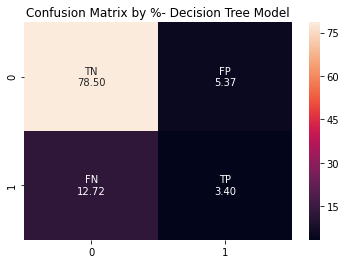

In [358]:
import seaborn as sns
textDT = np.asarray([['TN', 'FP'], ['FN', 'TP']])
dataDT=(conf_matrixDT/np.sum(conf_matrixDT)) *100
labelsDT = (np.asarray(["{0}\n{1:.2f}".format(textDT,dataDT) for textDT, dataDT in zip(textDT.flatten(), dataDT.flatten())])).reshape(2,2)
plt.title('Confusion Matrix by %- Decision Tree Model')
sns.heatmap(dataDT, annot=labelsDT, fmt='')

###### Feature Importance

In [291]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from pandas import DataFrame

#from sklearn.inspection import permutation_importance
decision_treeNew = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 
outputDT = cross_validate(decision_treeNew, x, y, cv=skf, scoring = 'accuracy', return_estimator =True)

all_feature_importanceDT=[]
for idx,estimator in enumerate(outputDT['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importancesDT = pd.DataFrame(estimator.feature_importances_,
                                       index = x.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    all_feature_importanceDT.append(feature_importancesDT)
    print(feature_importancesDT.head(10))

Features sorted by their score for estimator 0:
                         importance
OverTime_Yes                   0.15
YearsWithCurrManager           0.14
MonthlyIncome                  0.12
Age                            0.12
EnvironmentSatisfaction        0.06
DailyRate                      0.06
NumCompaniesWorked             0.05
DistanceFromHome               0.04
MonthlyRate                    0.03
PercentSalaryHike              0.03
Features sorted by their score for estimator 1:
                         importance
Age                            0.15
YearsWithCurrManager           0.12
OverTime_No                    0.11
OverTime_Yes                   0.08
YearsSinceLastPromotion        0.05
MaritalStatus_Single           0.05
DailyRate                      0.05
YearsInCurrentRole             0.05
WorkLifeBalance                0.04
NumCompaniesWorked             0.04
Features sorted by their score for estimator 2:
                       importance
YearsWithCurrManager         0

In [297]:
for i in range(0,10):
    print(all_feature_importanceDT[i].tail(10))

                                importance
Gender_Female                          0.0
RelationshipSatisfaction               0.0
EducationField_Other                   0.0
EducationField_Medical                 0.0
EducationField_Marketing               0.0
TotalWorkingYears                      0.0
EducationField_Human Resources         0.0
TrainingTimesLastYear                  0.0
HourlyRate                             0.0
BusinessTravel_Travel_Rarely           0.0
                                  importance
BusinessTravel_Travel_Frequently         0.0
BusinessTravel_Non-Travel                0.0
YearsAtCompany                           0.0
TrainingTimesLastYear                    0.0
StockOptionLevel                         0.0
RelationshipSatisfaction                 0.0
PerformanceRating                        0.0
PercentSalaryHike                        0.0
MonthlyIncome                            0.0
BusinessTravel_Travel_Rarely             0.0
                                

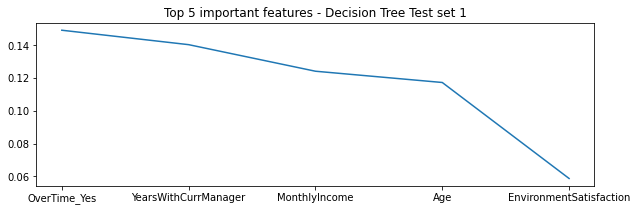

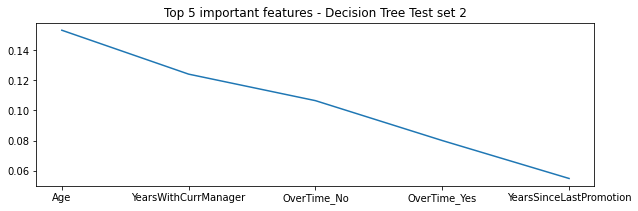

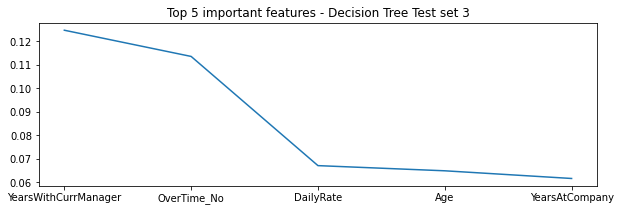

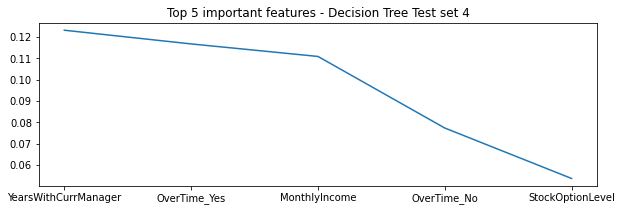

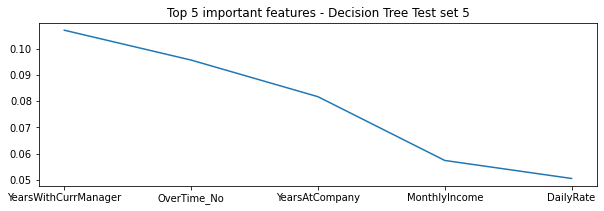

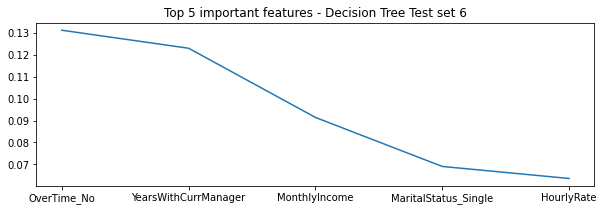

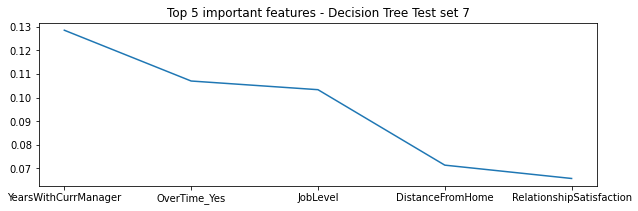

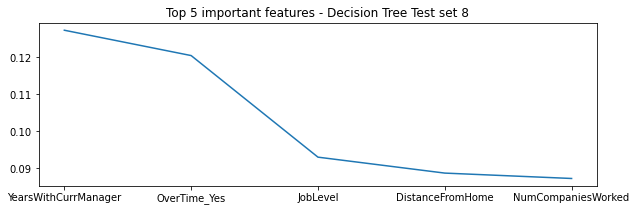

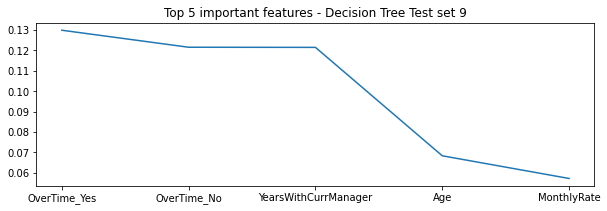

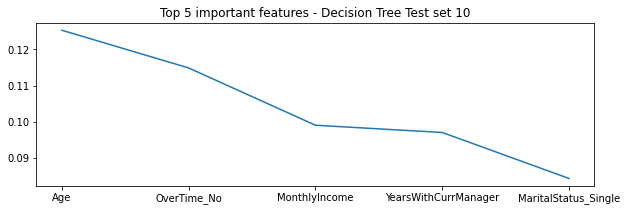

In [298]:
# create plots to see what are the top 5 important features in each training and testing set
for i in range(0,10):
    plt.figure(figsize=(10, 3))
    plt.plot(all_feature_importanceDT[i].head(5))
    plt.title(f'Top 5 important features - Decision Tree Test set {i+1}')

#### 3. Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

log = RandomForestClassifier(random_state=42)
ACCscores = cross_val_score(log,x, y,cv=skf)
F1scores = cross_val_score(log,x, y,scoring = 'f1',cv=skf)
print(f"""The accuracy score of random forest model is {ACCscores.mean()}
The f1 score of random forest model is {F1scores.mean()}""")

C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

The accuracy score of random forest model is 0.8565003639367632
The f1 score of random forest model is 0.3182963655681708


###### Hyperparameter Tuning

In [131]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(log.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
import numpy as np
# Random Search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 60, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,4,5, 6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [148]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
log = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = log, param_distributions = random_grid, n_iter = 100, cv = skf, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 63.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight...
                                                    warm_start=False),
   

In [149]:
#view the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1502,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

###### Re-fit the model using best parameters

In [353]:
### fit the model with best parameters and check the accuracy
from sklearn.model_selection import cross_val_score
logNew = RandomForestClassifier(random_state=42, bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,
                             min_samples_split=4,n_estimators=1502)

ACCscores = cross_val_score(logNew,x, y,cv=skf)
F1scores = cross_val_score(logNew,x, y,scoring = 'f1',cv=skf)
print(f"""The accuracy score of random forest model is {ACCscores.mean()}
The f1 score of random forest model is {F1scores.mean()}""")

The accuracy score of random forest model is 0.8632938921588627
The f1 score of random forest model is 0.3451469990643419


###### Confusion matrix

In [354]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred=cross_val_predict(logNew, x, y, cv=skf)
conf_matrix = confusion_matrix(y,y_pred)
conf_matrix

array([[1215,   18],
       [ 183,   54]], dtype=int64)

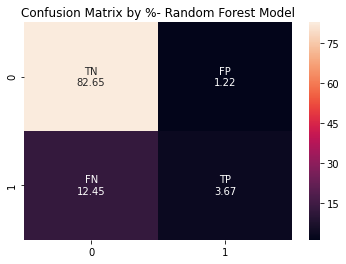

In [355]:
text = np.asarray([['TN', 'FP'], ['FN', 'TP']])
data=(conf_matrix/np.sum(conf_matrix)) *100
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2,2)
plt.title('Confusion Matrix by %- Random Forest Model')
sns.heatmap(data, annot=labels, fmt='')

###### Feature Importance

In [295]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from pandas import DataFrame

#from sklearn.inspection import permutation_importance
logNew = RandomForestClassifier(random_state=42, bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,
                             min_samples_split=4,n_estimators=1502)
output = cross_validate(logNew, x, y, cv=skf, scoring = 'accuracy', return_estimator =True)

all_feature_importance=[]
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = x.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    all_feature_importance.append(feature_importances)
    print(feature_importances.head(10))

Features sorted by their score for estimator 0:
                   importance
MonthlyIncome            0.08
Age                      0.06
TotalWorkingYears        0.05
DistanceFromHome         0.05
DailyRate                0.05
HourlyRate               0.04
MonthlyRate              0.04
YearsAtCompany           0.04
OverTime_No              0.04
OverTime_Yes             0.04
Features sorted by their score for estimator 1:
                   importance
MonthlyIncome            0.08
Age                      0.05
TotalWorkingYears        0.05
DailyRate                0.05
OverTime_No              0.05
OverTime_Yes             0.04
HourlyRate               0.04
DistanceFromHome         0.04
MonthlyRate              0.04
YearsAtCompany           0.04
Features sorted by their score for estimator 2:
                   importance
MonthlyIncome            0.08
Age                      0.05
TotalWorkingYears        0.05
DailyRate                0.05
DistanceFromHome         0.05
OverTime_No     

In [296]:
for i in range(0,10):
    print(all_feature_importance[i].tail(10))

                                   importance
BusinessTravel_Non-Travel            3.52e-03
PerformanceRating                    3.22e-03
JobRole_Manufacturing Director       1.83e-03
JobRole_Healthcare Representative    1.63e-03
JobRole_Human Resources              1.42e-03
EducationField_Human Resources       1.13e-03
Department_Human Resources           1.07e-03
EducationField_Other                 1.06e-03
JobRole_Manager                      1.04e-03
JobRole_Research Director            5.30e-04
                                   importance
PerformanceRating                    3.22e-03
JobRole_Manufacturing Director       2.34e-03
JobRole_Healthcare Representative    2.18e-03
BusinessTravel_Non-Travel            1.86e-03
JobRole_Human Resources              1.64e-03
Department_Human Resources           1.63e-03
EducationField_Human Resources       1.30e-03
EducationField_Other                 1.28e-03
JobRole_Manager                      8.65e-04
JobRole_Research Director         

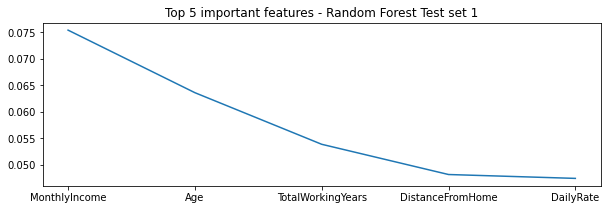

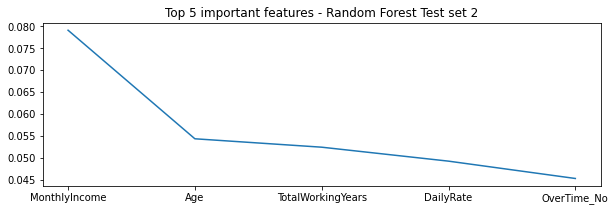

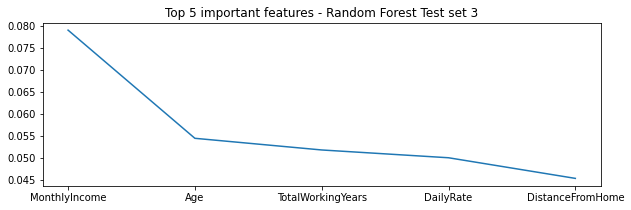

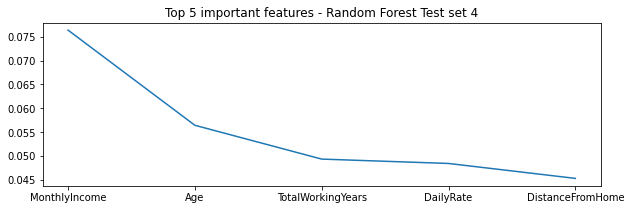

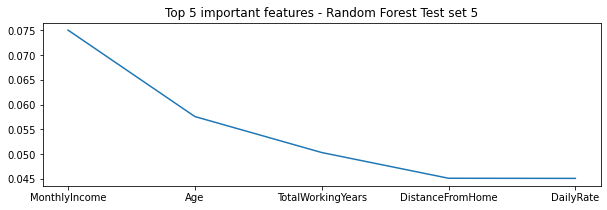

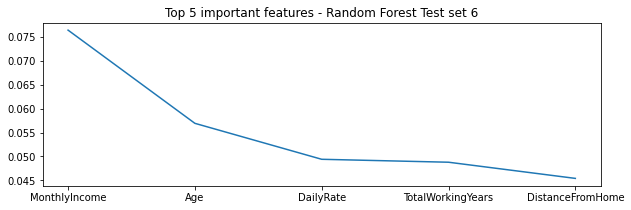

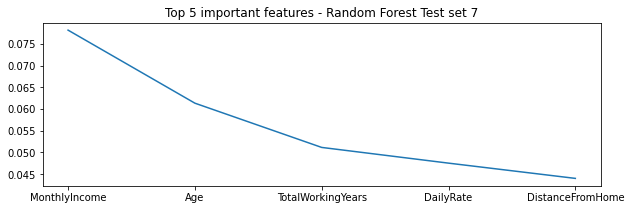

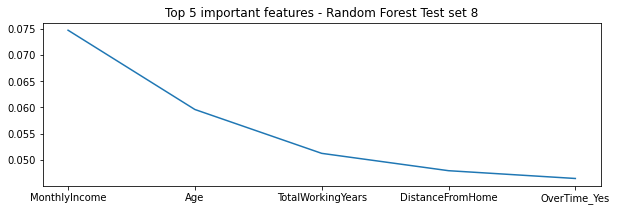

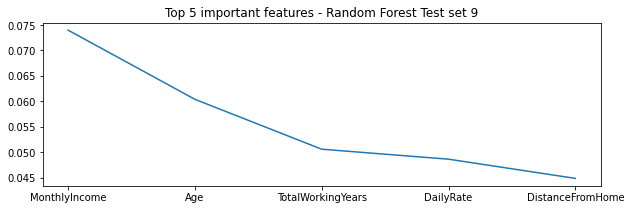

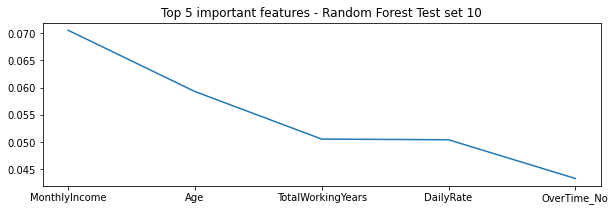

In [400]:
# create plots to see what are the top 5 important features in each training and testing set
for i in range(0,10):
    plt.figure(figsize=(10, 3))
    plt.plot(all_feature_importance[i].head(5))
    plt.title(f'Top 5 important features - Random Forest Test set {i+1}')

### 4. Model Ensumbles

In [330]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
# compare standalone models for binary classification
# create the sub models
estimators = []

model1 = LogisticRegression(random_state=42,penalty='l2',C=10,solver='newton-cg')
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
estimators.append(('decision_tree', model2))

model3 = RandomForestClassifier(random_state=42, bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,
                             min_samples_split=4,n_estimators=1502)
estimators.append(('random_forest', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
resultsALL = model_selection.cross_val_score(ensemble, x, y, cv=skf)
resultsF1ALL = model_selection.cross_val_score(ensemble, x, y, cv=skf,scoring='f1')
print(f'Overall accuracy score is {resultsALL.mean()} and overall f1 score is {resultsF1ALL.mean()}')

Overall accuracy score is 0.8660012542595712 and overall f1 score is0.3729452596085457


In [331]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_predEnsemble=cross_val_predict(ensemble, x, y, cv=skf)
conf_matrixEnsemble = confusion_matrix(y,y_predEnsemble)
conf_matrixEnsemble

array([[1213,   20],
       [ 177,   60]], dtype=int64)

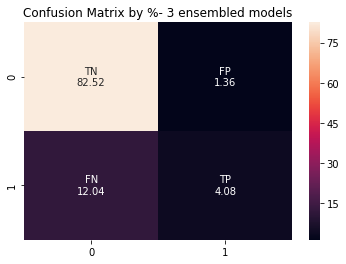

In [334]:
import seaborn as sns
text = np.asarray([['TN', 'FP'], ['FN', 'TP']])
dataEnsemble=(conf_matrixEnsemble/np.sum(conf_matrixEnsemble)) *100
labelsEnsemble = (np.asarray(["{0}\n{1:.2f}".format(text,dataEnsemble) for text, dataEnsemble in zip(text.flatten(), dataEnsemble.flatten())])).reshape(2,2)
plt.title('Confusion Matrix by %- 3 ensembled models')
sns.heatmap(dataEnsemble, annot=labelsEnsemble, fmt='')

### Model Evaluation

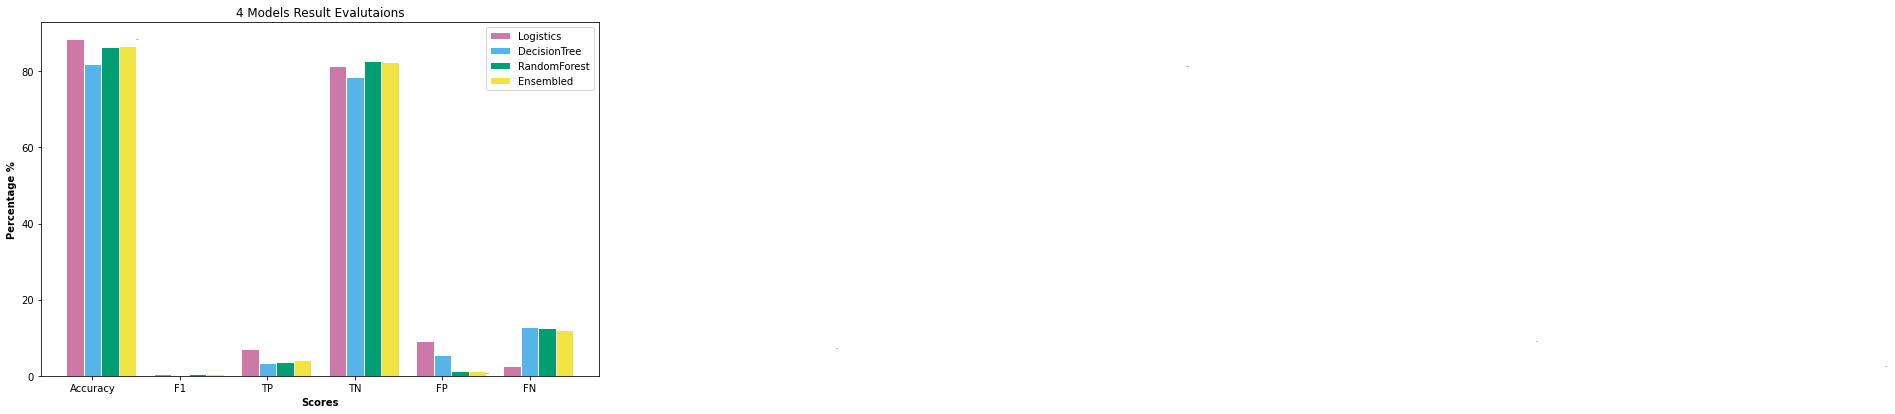

In [399]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# set how large the plot is
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 6.5)


# set width of bar
barWidth = 0.2


# set height of bar ---> accuracy -> f1 -> TP -> TN -> ->FP -> FN
bars1 = [88.43, 0.55, 7.07, 81.36, 9.05, 2.52] 
bars2 = [81.91, 0.28, 3.40, 78.50, 5.37, 12.72]
bars3 = [86.33, 0.35, 3.67, 82.65, 1.22, 12.45]
bars4 = [86.60, 0.37, 4.08, 82.52, 1.36, 12.04]
bars5 = bars1 + bars2 + bars3 + bars4   
  
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = r1 + r2 + r3 + r4
  
# Make the plot
plt.bar(r1, bars1, color='#CC79A7', width=barWidth, edgecolor='white', label='Logistics')
plt.bar(r2, bars2, color='#56B4E9', width=barWidth, edgecolor='white', label='DecisionTree')
plt.bar(r3, bars3, color='#009E73', width=barWidth, edgecolor='white', label='RandomForest')
plt.bar(r4, bars4, color='#F0E442', width=barWidth, edgecolor='white', label='Ensembled')
 
# Add xticks on the middle of the group bars
plt.xlabel('Scores', fontweight='bold')
plt.ylabel('Percentage %', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Accuracy', 'F1', 'TP', 'TN', 'FP', 'FN'])
plt.title('4 Models Result Evalutaions')
plt.legend()

# Create labels
label = ['88.43%', '54.62%', '7.07%', '81.36%', '9.05%', '2.52%', '81.91%', '27.73%', '3.40%', '78.50%', '5.37%', '12.72%','86.33%', '34.51%', '3.67%', '82.65%', '1.22%', '12.45%', '86.60%', '37.29%', '4.08%', '82.52%', '1.36%', '12.04%']
 
# Text on the top of each barplot
for i in range(len(r5)):
    plt.text(x = r5[i]-0.5, y = bars5[i]+0.1, s = label[i], size = 1)

# Create legend & Show graphic
plt.show()
fig.savefig('modelResults.png', dpi=300)

From all results comparision, logistics regression seems is the best model and it has the best performance.